# Teoría de grafos

## Flujo Máximo

Según Hillier y Lieberman (2010) un problema de flujo máximo se puede caracterizar de la siguiente forma:

1. Todo flujo a través de una red conexa dirigida se origina en un nodo, llamado origen, y termina en otro nodo llamado destino, suele utilizarse la notación $O$ y $T$ para referirse a los nodos origen y destino respectivamente).
2. Los nodos restante en la red se denominan nodos de trasbordo
3. Se permite el flujo a través de un arco, en donde, la cantidad máxima de flujo viene dada por la capacidad en el arco.
4. El objetivo es maximizar la cantidad de flujo total del origen al destino.

### Ejemplo 

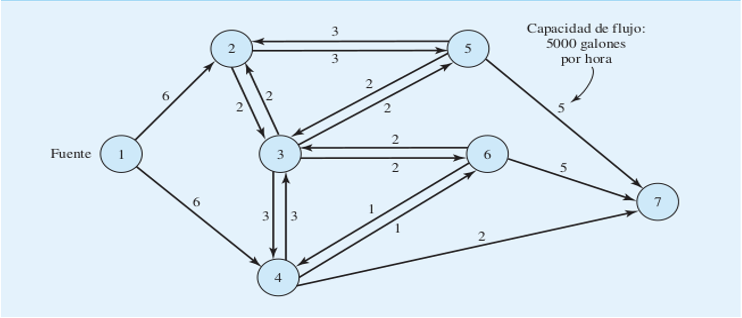

Vamos a resolver este ejemplo utilizando 2 librerías adicionalmente en [notion]() pueden ver una implementación del algoritmo.

In [1]:
%matplotlib inline 
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import maximum_flow

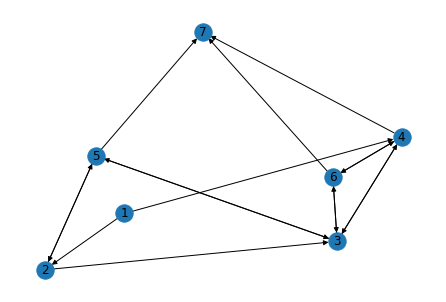

In [2]:
# Utilizando NetworkX
G = nx.DiGraph()

G.add_edge(1, 2, capacity=6)
G.add_edge(1, 4, capacity=6)

G.add_edge(2, 3, capacity=2)
G.add_edge(2, 5, capacity=3)

G.add_edge(3, 5, capacity=2)
G.add_edge(3, 4, capacity=3)
G.add_edge(3, 5, capacity=2)
G.add_edge(3, 6, capacity=2)

G.add_edge(4, 3, capacity=3)
G.add_edge(4, 6, capacity=1)
G.add_edge(4, 7, capacity=2)

G.add_edge(5, 2, capacity=3)
G.add_edge(5, 3, capacity=2)
G.add_edge(5, 7, capacity=5)

G.add_edge(6, 3, capacity=2)
G.add_edge(6, 4, capacity=1)
G.add_edge(6, 7, capacity=5)

nx.draw(G, with_labels = True)

Luego haciendo uso del método [`nx.maximum_flow`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.flow.maximum_flow.html) vamos a resolver el problema, el método acepta 3 parámetros el grafo, y los nodos origen y destino, al igual que en el problema de la ruta mas corta y el parámetro _capacity_ es el cual le indica a la librería cual atributo de los arcos utilizar para calcular el flujo.

In [3]:
flow_value, flow_dict = nx.maximum_flow(G, 1, 7)
print(flow_value)
print(flow_dict)

10
{1: {2: 5, 4: 5}, 2: {3: 2, 5: 3}, 4: {3: 2, 6: 1, 7: 2}, 3: {5: 2, 4: 0, 6: 2}, 5: {2: 0, 3: 0, 7: 5}, 6: {3: 0, 4: 0, 7: 3}, 7: {}}


Luego vamos a resolver el problema utilizando la librería scipy y especificamente la función `maximum_flow`

In [4]:
# Utilizando Scipy
X = csr_matrix([
    #1,2,3,4,5,6,7
    [0,6,0,6,0,0,0], #1
    [0,0,2,0,3,0,0], #2
    [0,2,0,3,2,2,0], #3
    [0,0,3,0,0,1,2], #4
    [0,3,2,0,0,0,5], #5
    [0,0,2,1,0,0,5], #6
    [0,0,0,0,0,0,0], #7
])

result = maximum_flow(X, 0, 6)

print(result)

MaximumFlowResult with value of 10


🎉🎉🎉 Listo ya sabemos resolver un problema de flujo máximo

**Nota**: si quieren saber que significa las siglas csr hacen referencia a _Compressed Sparse Row_ y puede leer un poco más [acá](https://en.wikipedia.org/wiki/Sparse_matrix#Compressed_sparse_row_(CSR,_CRS_or_Yale_format))